In [1]:
import pandas as pd
import glob
from pathlib import Path
import pandas_profiling
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
df = pd.read_csv('processed_dataset.csv')

In [4]:
df['measure_date'] = pd.to_datetime(pd.to_datetime(df['measure_date']).dt.date)
df['departure_date'] = pd.to_datetime(pd.to_datetime(df['departure_date']).dt.date)
df['arrival_date'] = pd.to_datetime(pd.to_datetime(df['arrival_date']).dt.date)

In [5]:
df.dtypes

departure_city                     object
arrival_city                       object
flight_duration                     int64
carrier_name                       object
agent_name                         object
flight_number                       int64
price                             float64
measure_date               datetime64[ns]
departure_date             datetime64[ns]
departure_hour                      int64
departure_minute                    int64
arrival_date               datetime64[ns]
arrival_hour                        int64
arrival_minute                      int64
days_left_to_departure              int64
previous_price_for_trip           float64
dtype: object

In [6]:
df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).size().nlargest(200)

departure_date  arrival_date  departure_city  arrival_city  flight_number  carrier_name         
2020-03-02      2020-03-02    berlin          brussels      5011           easyjet                  10
                                              kopenhagen    4549           easyjet                  10
                                                            4559           easyjet                  10
                                              zurich        5861           easyjet                  10
2020-03-05      2020-03-05    brussels        athens        1197           ryanair                  10
                              warsaw          barcelona     1475           wizz air                 10
2020-03-06      2020-03-06    kiev            istanbul      9684           buta airways             10
2020-03-08      2020-03-08    venice          amsterdam     3331           easyjet                  10
                              warsaw          barcelona     802            ukra

In [7]:
group_idx = df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).size().nlargest(100).index[0]

In [8]:
group_values = df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).get_group(group_idx)

In [9]:
group_values

,departure_city,arrival_city,flight_duration,carrier_name,agent_name,flight_number,price,measure_date,departure_date,departure_hour,departure_minute,arrival_date,arrival_hour,arrival_minute,days_left_to_departure,previous_price_for_trip
124046,berlin,brussels,90,easyjet,easyjet,5011,692.76,2020-02-03,2020-03-02,10,30,2020-03-02,12,0,28,NaN
24031,berlin,brussels,90,easyjet,easyjet,5011,1041.70,2020-02-06,2020-03-02,10,30,2020-03-02,12,0,25,692.76
43637,berlin,brussels,90,easyjet,easyjet,5011,1035.27,2020-02-09,2020-03-02,10,30,2020-03-02,12,0,22,1041.70
93751,berlin,brussels,90,easyjet,easyjet,5011,1516.84,2020-02-12,2020-03-02,10,30,2020-03-02,12,0,19,1035.27
98122,berlin,brussels,90,easyjet,easyjet,5011,1511.05,2020-02-15,2020-03-02,10,30,2020-03-02,12,0,16,1516.84
186305,berlin,brussels,90,easyjet,easyjet,5011,1508.01,2020-02-18,2020-03-02,10,30,2020-03-02,12,0,13,1511.05
154338,berlin,brussels,90,easyjet,easyjet,5011,2182.43,2020-02-21,2020-03-02,10,30,2020-03-02,12,0,10,1508.01
89486,berlin,brussels,90,easyjet,easyjet,5011,2192.59,2020-02-24,2020-03-02,10,30,2020-03-02,12,0,7,2182.43
179189,berlin,brussels,90,easyjet,easyjet,5011,2693.15,2020-02-27,2020-03-02,10,30,2020-03-02,12,0,4,2192.59
6798,berlin,brussels,90,easyjet,easyjet,5011,2745.67,2020-03-01,2020-03-02,10,30,2020-03-02,12,0,1,2693.15


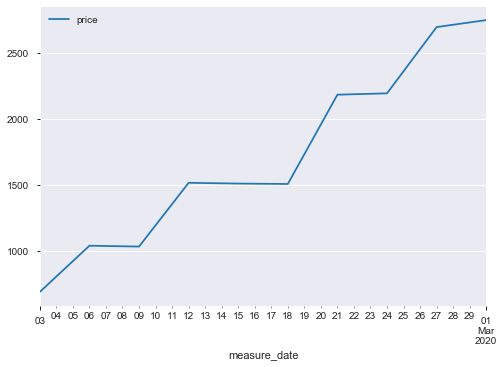

In [10]:
group_values.plot(x='measure_date', y='price')